<a href="https://colab.research.google.com/github/Loick54/PUC/blob/main/JAEGER_LOICK_Test1_RaulBenitez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN CURSO ANALISIS DE DATOS - PUC EEIGM October 2024 (20min)
Test 1 |
**Raúl Benítez**

1. Use the function load_dataset from the seaborn libarry to load the dataset 'diamonds'

https://seaborn.pydata.org/generated/seaborn.load_dataset.html

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

diam = sns.load_dataset('diamonds') #cargar datas
diam.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2. Eliminad las variables 'carat', 'color', 'clarity'. Utilizaremos 'table', 'price', 'x', 'y' y 'z' como features y la variable 'cut' como etiqueta de clase.


In [2]:
diam1=diam.drop(['carat', 'color', 'clarity'], axis=1)
diam1.head()

,cut,depth,table,price,x,y,z
0,Ideal,61.5,55.0,326,3.95,3.98,2.43
1,Premium,59.8,61.0,326,3.89,3.84,2.31
2,Good,56.9,65.0,327,4.05,4.07,2.31
3,Premium,62.4,58.0,334,4.20,4.23,2.63
4,Good,63.3,58.0,335,4.34,4.35,2.75


3. Representad los datos mediante un scatter plot matrix utilizando colores diferentes para cada clase

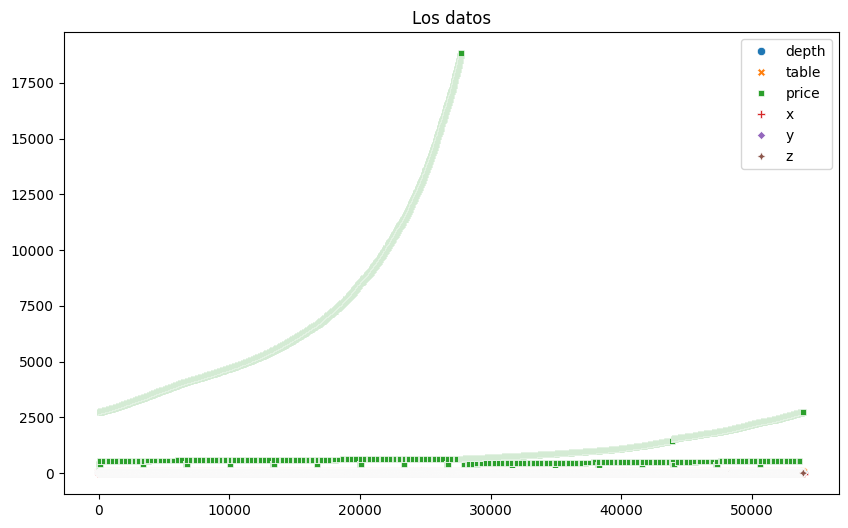

In [20]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(diam1)
ax.set_title('Los datos')
plt.show()

4. Dividid los datos en los subconjuntos de entrenamiento (70%) y test (30%)

In [6]:
from sklearn.model_selection import train_test_split

diam1_numeric = diam1.select_dtypes(include=np.number) #on sélectionne que les valeurs numériques dans pg1
diam1_numeric #on renvoie le résultat


# X is already defined as pg1_numeric
X = diam1_numeric

# Filter 'species' column to match rows in pg1_numeric
y = diam1['cut']

# Now X and y should have the same number of samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #ça sélectionne random des valeurs pour Xtrain, Xtest, ....

5. Ajustad 5 modelos de clasificación: KNN, Gaussian Naive Bayes, Decision Trees, Quadratic Discriminant Analysis (QDA). Reportar las matrices de confusion y el classification report.

https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html

¿Qué modelo de clasificación presenta un mayor promeio del F1-score?


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
y_knn_pred = knn.fit(X_train, y_train).predict(X_test)
CM_KNN = confusion_matrix(y_test, y_knn_pred)
print('CONFUSION MATRIX KNN: \n {} '.format(CM_KNN))

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_NB_pred = gnb.fit(X_train, y_train).predict(X_test)
CM_NB = confusion_matrix(y_test, y_NB_pred)
print('CONFUSION MATRIX NB: \n {}'.format(CM_NB))

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
dt = DecisionTreeClassifier()
y_DT_pred = dt.fit(X_train, y_train).predict(X_test)
CM_DT = confusion_matrix(y_test, y_DT_pred)
print('CONFUSION MATRIX DT: \n {}'.format(CM_DT))
plt.figure(figsize=(10,10))
ax = plot_tree(dt)
plt.show()

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
y_QDA_pred = qda.fit(X_train, y_train).predict(X_test)
CM_QDA = confusion_matrix(y_test, y_QDA_pred)
print('CONFUSION MATRIX QDA: \n {}'.format(CM_QDA))


CONFUSION MATRIX KNN: 
 [[ 134  165   73   75  107]
 [  78  515  293  356  374]
 [  23  242 5814  538  550]
 [  46  372 1156 2294  616]
 [  60  470 1487  980  983]] 
CONFUSION MATRIX NB: 
 [[ 208  279    6   25   36]
 [  86  329  248  277  676]
 [   5   10 6191  833  128]
 [   2   48 1003 2905  526]
 [  11  157 1482 1443  887]]
CONFUSION MATRIX DT: 
 [[ 461   53   13   12   15]
 [  59 1088   36   45  388]
 [   7   42 5624  590  904]
 [   9   45  568 3298  564]
 [   9  384  852  587 2148]]


KeyboardInterrupt: 

In [9]:
from sklearn.metrics import classification_report
print('KNN: \n')
print(classification_report(y_test, y_knn_pred))

KNN: 

              precision    recall  f1-score   support

        Fair       0.39      0.24      0.30       554
        Good       0.29      0.32      0.30      1616
       Ideal       0.66      0.81      0.73      7167
     Premium       0.54      0.51      0.53      4484
   Very Good       0.37      0.25      0.30      3980

    accuracy                           0.55     17801
   macro avg       0.45      0.43      0.43     17801
weighted avg       0.52      0.55      0.53     17801



In [10]:
print('GNB: \n')
print(classification_report(y_test, y_NB_pred))

GNB: 

              precision    recall  f1-score   support

        Fair       0.67      0.38      0.48       554
        Good       0.40      0.20      0.27      1616
       Ideal       0.69      0.86      0.77      7167
     Premium       0.53      0.65      0.58      4484
   Very Good       0.39      0.22      0.28      3980

    accuracy                           0.59     17801
   macro avg       0.54      0.46      0.48     17801
weighted avg       0.56      0.59      0.56     17801



In [11]:
print('DT: \n')
print(classification_report(y_test, y_DT_pred))

DT: 

              precision    recall  f1-score   support

        Fair       0.85      0.83      0.84       554
        Good       0.67      0.67      0.67      1616
       Ideal       0.79      0.78      0.79      7167
     Premium       0.73      0.74      0.73      4484
   Very Good       0.53      0.54      0.54      3980

    accuracy                           0.71     17801
   macro avg       0.72      0.71      0.71     17801
weighted avg       0.71      0.71      0.71     17801



In [12]:
print('QDA: \n')
print(classification_report(y_test, y_QDA_pred))

QDA: 



NameError: name 'y_QDA_pred' is not defined